#### **Computational Intelligence in Manufacturing Systems**
#### **MFAIMFG**
###### Created by: Wynnezel Wayne Naoto P Akeboshi
##### Checked by: SME Academics Database team
##### Initial Publish: January 10, 2021
##### Assignment Code from the class of: Dr. Robert Kerwin Billones

### Machine Learning Exercise 2 - Logistic Regression

#### **A LINE BY LINE EXPLANATION**

#### **CODE DESIGN**
#### Logistic regression

##### **Code segment no. 1**
Imports the numpy, pandas, and matplotlib libraries and assigned with shortnames.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# imports the functions and methods of numpy, pandas, and matplotlib. See PS1.

%matplotlib inline

##### **Code segment no. 2**
Imports the operating system's library and retrieves the reference file. This reference file then has its columns labeled accordingly. Then the dataset has its first 5 entries presented in a tabular manner.

In [2]:
import os
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()
# imports operating system (OS) library and finds the specific file
# the file is read as csv and saved sa 'data'

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


##### **Code segment no. 3**
The data is then classified into those admitted and not admitted. This data is plotted on a scatter plot labeling those admitted as circles and those not admitted as 'X's. 

Text(0, 0.5, 'Exam 2 Score')

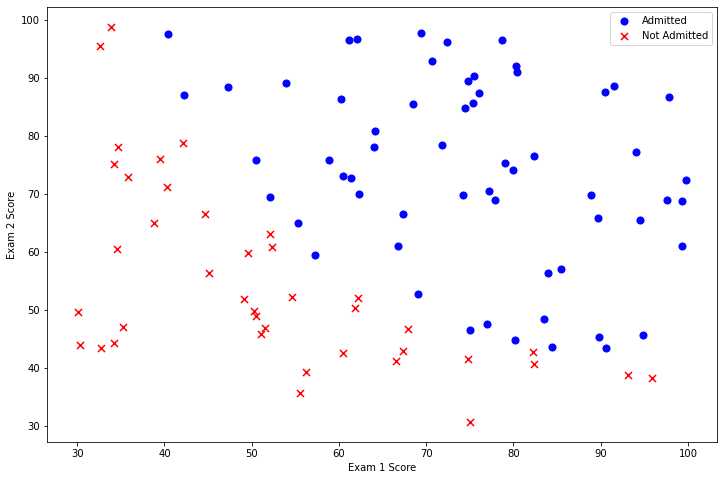

In [3]:
positive = data[data['Admitted'].isin([1])]
# gets the column called 'Admitted' from dataframe called 'data'. Each entry in the column is checked if
# the value is either 1 or 0. 1 means admitted and 0 means admitted. the 0 and 1 format is based on the data,
# not necessarily because of the program. 
negative = data[data['Admitted'].isin([0])]
# gets the column called 'Admitted' and checks if the value is 0. The .isin function returns a dataframe
# of the matched values. This specific function returns all those who did not pass.

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
# creates a scatter plot within the figure fig. this line creates the plot for those admitted using the o marker.
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
# creates a scatter plot within the figure fig. this creates the plot for those not admitted using the x marker.
ax.legend()
# creates a legend
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
# sets x-axis and y-axis labels as exam scores 1 and 2.
# use ax.scatter? to show the full documentation on the scatter function (this includes parameters and return type)

In [4]:
ax.scatter?

Signature:
ax.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=<deprecated parameter>,
    edgecolors=None,
    *,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : scalar or array-like, shape (n, )
    The data positions.

s : scalar or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2-D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because th

##### **Code segment no. 4** (put your comments for this code segment)
A sigmoid function is defined with a single input parameter named z.

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# this is simply the formula for the sigmoid function. sigmoid is a logarithmic function that goes from 0 to 1 only.
# sigmoid function, when plotted, creates a function evenly divided in the center. this function is used in 
# machine learning because of its division in the middle. this is used to decide between two options, rather than a
# scale of options. i.e good for choosing between yes or no but not a letter from a-z. 

##### **Code segment no. 5**
The sigmoid function is then plotted as a line graph.

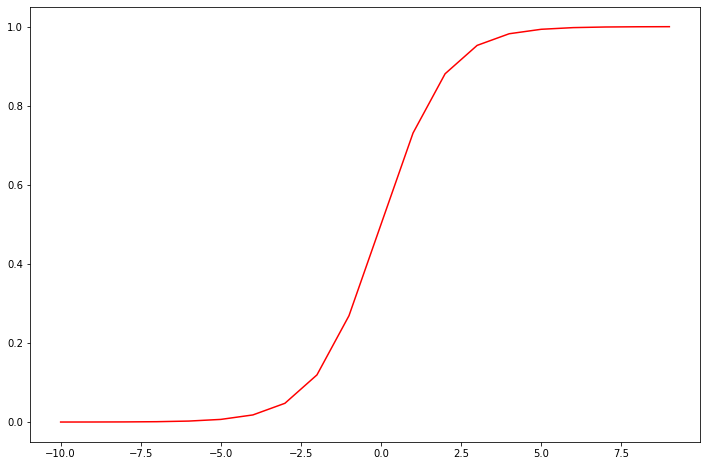

In [6]:
nums = np.arange(-10, 10, step=1)
# creates an array from -10 to 10 with an increment, or spacing, of 1.

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
# creates a line graph of the sigmoid function

# the graph below shows the sigmoid function. this is exactly what it looks like. the division is exactly in the middle.
# the shape of the graph is what makes it useful for deciding between two things, because its close to either just 0 or 1
# in the y-axis.

##### **Code segment no. 6**
A cost function is defined taking in three input parameters, namely theta, X, and y. Matrices are made using these parameters. Then the cost is then returned.

In [7]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

# this is the error or cost computation in a sigmoid function. the returned value is how 'wrong' a value is.

##### **Code segment no. 7**
add a ones column - this makes the matrix multiplication work out easier

In [8]:
data.insert(0, 'Ones', 1)
# inserts a ones column in the dataframe. makes matrix operations easier.

##### set X (training data) and y (target variable)

In [9]:
cols = data.shape[1]
# gets the number of columns and saves it in cols.
X = data.iloc[:,0:cols-1]
# iloc retrieves all the rows, and columns from 0 to cols - 1 then saves in X.
y = data.iloc[:,cols-1:cols]
# iloc retrieves all the rows, and columns from cols-1 to cols then saves in y

##### convert to numpy arrays and initalize the parameter array theta

In [10]:
X = np.array(X.values)
# X (currently a dataframe) values are retrieved and turned into an array. then overwrites X.
y = np.array(y.values)
# y (currently a dataframe) values are retrieved and turned into an array. then overwrites y.
theta = np.zeros(3)
# creates an array filled with 0s. takes shape (or size) as a parameter. this line creates an array of 3 0s.
# we create theta because this is the 'weight' or 'coefficient' that fits the model. but this will be adjusted
# thus, we start from 0, then adjusted to the optimal theta value.

##### **Code segment no. 8**
The sizes of the X, theta, and y matrices are displayed.

In [11]:
X.shape, theta.shape, y.shape
# returns the size (shape) of X, theta, and y

((100, 3), (3,), (100, 1))

##### **Code segment no. 9**
Cost is computed using the cost function taking in the three input parameters.

In [12]:
cost(theta, X, y)
# returns the error or cost of the current 0 theta.

0.6931471805599453

##### **Code segment no. 10**
Here a gradient function is defined. This function takes three input parameters and returns a grad matrix.

In [13]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # converts the arrays X, y, and theta into matrices
    
    parameters = int(theta.ravel().shape[1])
    # theta.ravel() 'flattens' the matrix
    # .shape[1] returns the number of columns of theta.ravel()
    # this is then saved into parameters
    grad = np.zeros(parameters)
    # an array filled with 0s is made, with n (parameters) number of entries.
    
    error = sigmoid(X * theta.T) - y
    
    # error is computed using the sigmoid function.
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    # gradient is simply a PARTIAL derivative of the function. i.e deriving ax+by+cz w.r.t x, y, then z. 
    # the partial derivatives are called gradients. this is like ok how much influence (gradient) does X
    # and y have onto the function. what is the most optimal gradient that would accurately fit the model.
    
    return grad
# returns the list of gradients or weights

##### **Code segment no. 11**
A gradient matrix is solved using the previous parameters: theta, X, and y.

In [14]:
gradient(theta, X, y)
# solves for the gradient based on our previously collected theta, X, and y

array([ -0.1       , -12.00921659, -11.26284221])

##### **Code segment no. 12**
Scipy library is imported. A result array is returned by minimizing a function through the fmin_tnc function.

In [15]:
import scipy.optimize as opt
# imports optimize library from scipy. assigned alias is opt.
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
# func is a function. this case takes the cost function (as defined in segment 6).
# x0 is the initial minimum, which was theta [0,0,0]. 
# fprime is the gradient formula or the partial derivative of the sigmoid function
# args are the input or training values
result

# the .fmin_tnc() function returns in the exact order: the solution, number of attempts/iterations/evaluations, 
# and the return code. the return code is the remarks on the solution. 
# use opt.fmin_tnc? for full documentation on the return codes.

# the output of fmin_tnc is saved into result. this is a tuple with 3 values: the solution, number of evaluations, 
# and return code.

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [16]:
opt.fmin_tnc?

Signature:
opt.fmin_tnc(
    func,
    x0,
    fprime=None,
    args=(),
    approx_grad=0,
    bounds=None,
    epsilon=1e-08,
    scale=None,
    offset=None,
    messages=15,
    maxCGit=-1,
    maxfun=None,
    eta=-1,
    stepmx=0,
    accuracy=0,
    fmin=0,
    ftol=-1,
    xtol=-1,
    pgtol=-1,
    rescale=-1,
    disp=None,
    callback=None,
)
Docstring:
Minimize a function with variables subject to bounds, using
gradient information in a truncated Newton algorithm. This
method wraps a C implementation of the algorithm.

Parameters
----------
func : callable ``func(x, *args)``
    Function to minimize.  Must do one of:

    1. Return f and g, where f is the value of the function and g its
       gradient (a list of floats).

    2. Return the function value but supply gradient function
       separately as `fprime`.

    3. Return the function value and set ``approx_grad=True``.

    If the function returns None, the minimization
    is aborted.
x0 : array_like
    Initial e

##### **Code segment no. 13**
A new cost is returned using the new result.

In [17]:
cost(result[0], X, y)
# a new cost or error is computed using the new optimal solution (result[0])

0.20349770158947425

##### **Code segment no. 14**
A prediction function is made. This function identifies admittance or non-admittance based on probability.

In [18]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
# this is the prediction formula. it computes for the probability using the sigmoid function. (rmr sigmoid is only 0 to 1)
# if this probability is >= 0.1, it returns 1 (admitted), otherwise from 0 to 0.5, it returns 0 (not admitted)

##### **Code segment no. 15**
The predictions are compared to the correct answers. Then the number of correct predictions are then compared to compute for the accuracy of the program.

In [19]:
theta_min = np.matrix(result[0])
# converts the tuple result[0] (optimal solution) into a matrix. the matrix is saved in theta_min
predictions = predict(theta_min, X)
# creates a list of predictions using the optimal solution and the X (training data).

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# predictions and y are saved in a zip object with temporary variables assigned as a (predictions) and b (y)
# for each iteration, it checks if a (predictions) and b (y) are the same. if the prediction is correct, 
# the item in the list 'correct' is saved as 1 if not 0.

accuracy = (sum(map(int, correct)) / len(correct) * 100)
# converts all correct items into integers. then the count of the correct predictions is taken.
# number of correct predictions is divided into total number of comparisons. (correct / total items) * 100 = accuracy.
# previous code used % instead of /. this is incorrect in computing accuracy because remainder stays the same as long
# as len(correct) > sum(correct). 

# in this case, nagkataon lang na len(correct) or total rows = 100 kaya the answer is the same. See next line for proof.

print ('accuracy = {:.2f}'.format(accuracy))

accuracy = 89.00


In [20]:
print ("score / 100:\t", sum(map(int, correct)) % len(correct), "\nscore / 105:\t", sum(map(int, correct)) % 105)
print("\nThis is incorrect because accuracy should be lower in score / 105")
print ("\nCorrect answers \nscore / 100:\t", sum(map(int, correct)) / len(correct) * 100)
print ("score / 105:\t{:.2f}".format(sum(map(int, correct)) / 105 * 100))

score / 100:	 89 
score / 105:	 89

This is incorrect because accuracy should be lower in score / 105

Correct answers 
score / 100:	 89.0
score / 105:	84.76


#### Regularized logistic regression

##### **Code segment no. 16**
The new data files are imported. These files has their columns then labeled as Test 1, Test 2, and Accepted respectively. Then the first 5 data entries are presented.

In [21]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()
# retrieves ex2data2 file and reads into a csv file.

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


##### **Code segment no. 17**
Data is classified into accepted and not accepted. This data is then plotted accordingly using Test 1 and 2 scores while being classified into accepted and rejected.

Text(0, 0.5, 'Test 2 Score')

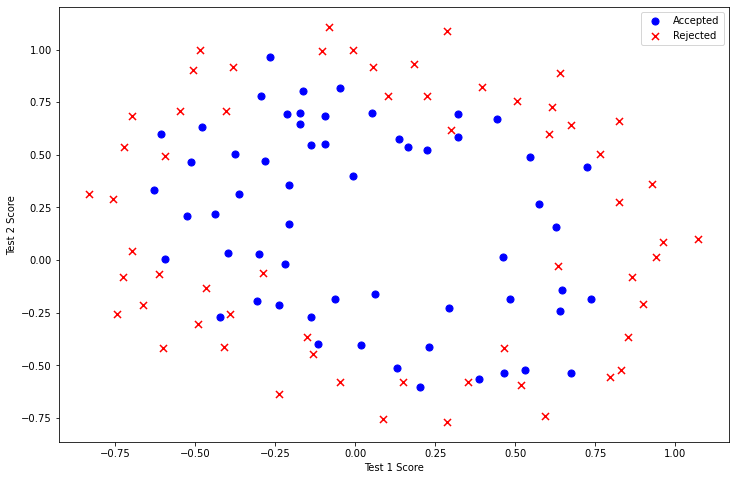

In [22]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]
# see segment 3. this is the classification of the data into accepted and not accepted

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
# creates plots for both accepted and not accepted students
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
# creates a legend and sets labels for x-axis and y-axis.

##### **Code segment no. 18**
Map features are created using a degree of 5. This data is presented accordingly

In [23]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
# this is feature mapping. this basically determines a set of 'features' for the program to consider. it identifies
# what 'features' are redundant and which are relevant. increasing degree increases the number of features
# basically features are what the program should consider as important and relevant in decision making/solving.
# more features does mean more accurate, but you must consider that too many features or being too accurate will ONLY
# hold true to this specific dataset. this is called overfitting. if you overfit, the model will be more accurate for your
# training data but not necessarily to new data. 

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)
# removes entire columns

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


##### **Code segment no. 19**
A cost function is defined with 4 inputs. A learning rate is now included in this logisitic function.

In [24]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

# this computes cost or error similar to the sigmoid function. the primary difference is the reg variable. 
# this reg variable is Ridge regularization. See next line for the full explanation

**Regularization**</br>
Features are 'considerations' or 'factors' in a data. For example, we take the pricing of houses in a city. Features in this case would be the things that affected price such as lot size, location, neighborhood, population, number of bedrooms. All of these are features but some features affect or influence price more than the other. Location could increase or decrease pricing by the millions, while population of neighborhood would only increase or decrease by the thousands.</br> </br>
In machine learning, we try to identify *how much* a feature can affect price. The formulas we use identifies the influence of these features simultaneously. A (+) feature increases probability of the effect desired while (-) feature decreases probability. We solve for features (like in feature mapping) by identifying how much a feature affects price in a *specific row of training data*. </br></br>
In the case of the costReg function, we include Ridge regularization called variable reg. This regularization is the square of the sum of the coefficients. This part basically *reduces* the influence of features in our model. For example, lot size (feature) affecting pricing by hundred thousands in our model would be reduced to ten thousands instead. Ultimately *decreasing* the accuracy of our model **only** for the training data. The concept of decreasing accuracy is to prevent overfitting as earlier mentioned. This decreased accuracy makes our data more generalized, allowing it to be just as accurate when presented with new data. This also increases the precision of our predictions regardless of input ultimately becoming more consistent with new data.

##### **Code segment no. 20**
A gradient function is defined with 4 inputs. This returns a gradient array.

In [25]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

# gradient here is the partial derivative of our function. in this case, we include learning rate as this factor 
# 'slows down' or minimizes the adjustment of coefficients or influence/weight of features. 
# a higher learning rate would speed up learning but may also overfit the model to the training data which we want to avoid

##### **Code segment no. 21**
##### set X and y (remember from above that we moved the label to column 0)

In [26]:
data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [27]:
cols = data2.shape[1]
# we take the number of columns of our data
X2 = data2.iloc[:,1:cols]
# we retrieve all rows, and columns from 1 to cols
y2 = data2.iloc[:,0:1]
# we retrieve all rows, and columns from 0 to 1


##### convert to numpy arrays and initalize the parameter array theta

In [28]:
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)
# dataframes are converted again into arrays then saved into X2, y2, and theta2

##### **Code segment no. 22**
A learning rate of 1 is set.

In [29]:
learningRate = 1
# assigning learning rate to be equal to 1

##### **Code segment no. 23**
A new cost is identified.

In [30]:
costReg(theta2, X2, y2, learningRate)
#cost of current theta [0,0,0] is computed

0.6931471805599454

##### **Code segment no. 24**
A new gradient array is computed.

In [31]:
gradientReg(theta2, X2, y2, learningRate)
# the weight or gradient of each feature is returned.

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

##### **Code segment no. 25**
New results are made by optimizing the cost function using a the previously computed gradient.

In [32]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
# fmin_tnc again returns the optimal solution. See seg 12. This time, it uses the costReg and gradientReg functions.

result2

(array([ 1.22702519e-04,  7.19894617e-05, -3.74156201e-04, -1.44256427e-04,
         2.93165088e-05, -5.64160786e-05, -1.02826485e-04, -2.83150432e-04,
         6.47297947e-07, -1.99697568e-04, -1.68479583e-05]),
 96,
 1)

##### **Code segment no. 26**
The prediction function solves the given data. It's output is compared to the correct outputs based on the data. The number of correct outputs are then used to solve for the accuracy of the model.

In [33]:
theta_min = np.matrix(result2[0])
# optimal solution is assigned to theta_min

predictions = predict(theta_min, X2)
# predictions are made using the optimal solution and saved into 'predictions' variable

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
# See segment 15. This code compares the predictions to actual admittance.

accuracy = (sum(map(int, correct)) / len(correct) * 100)
#Refer to segment 15 for the correction in code. Solves for the accuracy of the prediction.

print ('accuracy = {:.2f}%'.format(accuracy))

accuracy = 65.25%


##### **Code segment no. 27**
The sklearn library is imported. Using the logistic regression function directly, the model is fit into the dataset using logistic regression.

In [34]:
# this example is solely to show that regularized logistic regression can be done within the sklearn library.
# the previous example is the manual solution 

from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
# the l2 penalty is the Ridge regularization. 
# C = 1.0 is regularization strength or how much regularization can influence the cost.

model.fit(X2, y2.ravel())
# the model is fit to the data using the sklearn library


LogisticRegression()

##### **Code segment no. 28**
The accuracy of the model is identified.

In [35]:
print('Accuracy: {:.2f}%'.format(model.score(X2, y2)*100))
# returns the accuracy of the model


Accuracy: 66.10%


In [36]:
x1=np.arange(25, 100.1, 0.1)
x2=np.arange(25, 100.1, 0.1)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data1=pd.DataFrame(data=combinations)

x1 = data1[0]
x2 = data1[1]

data1.insert(0, 'Ones', 1)

X1 = np.array(data1)
y1 = predict(theta_min1,X1)
data1['Predicted']=y1

data = pd.read_csv(os.getcwd() + '\ex2data1.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

pred_positive = data1[data1['Predicted'].isin([1])]
pred_negative = data1[data1['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

NameError: name 'theta_min1' is not defined

In [ ]:
x1=np.arange(-1.2, 1.21, 0.01)
x2=np.arange(-1.2, 1.21, 0.01)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data3=pd.DataFrame(data=combinations)

x1 = data3[0]
x2 = data3[1]

data3.insert(2, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data3['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

cols = data3.shape[1]
X3 = data3.iloc[:,2:cols]
X3 = np.array(X3.values)
print(theta_min.shape)
y3 = predict(theta_min,X3)
data3['Predicted']=y3

data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

pred_positive = data3[data3['Predicted'].isin([1])]
pred_negative = data3[data3['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [ ]:
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    data2['F' + str(0) + str(j+1)] = np.power(x1, 0) * np.power(x2, j+1)#additonal feature

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

#print(data2.head())

cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

costReg(theta2, X2, y2, learningRate)
gradientReg(theta2, X2, y2, learningRate)
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))

theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))
#print(theta_min)

In [ ]:
x1=np.arange(-1, 1.2, 0.01)
x2=np.arange(-1, 1.2, 0.01)
mesh = np.array(np.meshgrid(x1, x2))
combinations = mesh.T.reshape(-1, 2)

data3=pd.DataFrame(data=combinations)

x1 = data3[0]
x2 = data3[1]

data3.insert(2, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data3['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    data3['F' + str(0) + str(j+1)] = np.power(x1, 0) * np.power(x2, j+1)

cols = data3.shape[1]
X3 = data3.iloc[:,2:cols]
X3 = np.array(X3.values)
theta3 = np.zeros(X3.shape[1])

y3 = predict(theta_min,X3)
data3['Predicted']=y3

data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

pred_positive = data3[data3['Predicted'].isin([1])]
pred_negative = data3[data3['Predicted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pred_positive[0], pred_positive[1], s=5, c='b', marker='o')
ax.scatter(pred_negative[0], pred_negative[1], s=5, c='r', marker='o')
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='black', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='green', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')